In \[1\]:

    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, LSTM
    from scipy.stats import zscore

    # load the Apple stock historical data into a pandas dataframe
    df = pd.read_csv('AAPL.csv')

# Preprocessing<a href="#Preprocessing" class="anchor-link">¶</a>

In \[2\]:

    df=df.drop(['Date','Adj Close'], axis=1)

In \[3\]:

    df['Close_Output'] = df.loc[:, 'Close']
    df

Out\[3\]:

|       | Open       | High       | Low        | Close      | Volume    | Close_Output |
|-------|------------|------------|------------|------------|-----------|--------------|
| 0     | 0.128348   | 0.128906   | 0.128348   | 0.128348   | 469033600 | 0.128348     |
| 1     | 0.122210   | 0.122210   | 0.121652   | 0.121652   | 175884800 | 0.121652     |
| 2     | 0.113281   | 0.113281   | 0.112723   | 0.112723   | 105728000 | 0.112723     |
| 3     | 0.115513   | 0.116071   | 0.115513   | 0.115513   | 86441600  | 0.115513     |
| 4     | 0.118862   | 0.119420   | 0.118862   | 0.118862   | 73449600  | 0.118862     |
| ...   | ...        | ...        | ...        | ...        | ...       | ...          |
| 10635 | 152.350006 | 153.000000 | 150.850006 | 152.550003 | 59095900  | 152.550003   |
| 10636 | 150.199997 | 151.300003 | 148.410004 | 148.479996 | 58867200  | 148.479996   |
| 10637 | 148.869995 | 149.949997 | 147.160004 | 148.910004 | 51011300  | 148.910004   |
| 10638 | 150.089996 | 150.339996 | 147.240005 | 149.399994 | 48394200  | 149.399994   |
| 10639 | 147.110001 | 147.190002 | 145.720001 | 146.710007 | 55418200  | 146.710007   |

10640 rows × 6 columns



In \[4\]:

    input  = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    norm_input=zscore(input)
    norm_input

Out\[4\]:

|       | Open      | High      | Low       | Close     | Volume    |
|-------|-----------|-----------|-----------|-----------|-----------|
| 0     | -0.468091 | -0.467760 | -0.468286 | -0.467992 | 0.421394  |
| 1     | -0.468262 | -0.467945 | -0.468475 | -0.468179 | -0.446976 |
| 2     | -0.468511 | -0.468191 | -0.468727 | -0.468428 | -0.654796 |
| 3     | -0.468449 | -0.468114 | -0.468648 | -0.468350 | -0.711927 |
| 4     | -0.468356 | -0.468022 | -0.468553 | -0.468257 | -0.750412 |
| ...   | ...       | ...       | ...       | ...       | ...       |
| 10635 | 3.778657  | 3.745569  | 3.786582  | 3.781057  | -0.792931 |
| 10636 | 3.718675  | 3.698715  | 3.717700  | 3.667597  | -0.793608 |
| 10637 | 3.681570  | 3.661507  | 3.682413  | 3.679585  | -0.816879 |
| 10638 | 3.715606  | 3.672256  | 3.684671  | 3.693244  | -0.824631 |
| 10639 | 3.632469  | 3.585438  | 3.641762  | 3.618256  | -0.803825 |

10640 rows × 5 columns



# fnn<a href="#fnn" class="anchor-link">¶</a>

In \[5\]:

    !rm -rf ./logs/

In \[6\]:

    # create a list of arrays with the last 7 rows for each record
    data = [norm_input.iloc[i-7:i].values.flatten() for i in range(7, len(norm_input))]
    data[0]

Out\[6\]:

    array([-0.46809111, -0.46776033, -0.46828558, -0.46799227,  0.42139418,
           -0.46826236, -0.46794488, -0.46847461, -0.46817894, -0.44697645,
           -0.46851146, -0.46819098, -0.46872668, -0.46842785, -0.65479619,
           -0.46844919, -0.46811408, -0.46864791, -0.46835007, -0.71192671,
           -0.46835576, -0.46802178, -0.46855337, -0.46825671, -0.75041184,
           -0.46815338, -0.46782185, -0.46834859, -0.46805449, -0.82393172,
           -0.46798214, -0.46765265, -0.46817532, -0.46788338, -0.85730762])

In \[7\]:

    # create X by concatenating the data arrays
    data_35_features = np.concatenate(data, axis=0).reshape(-1,35)

    # print the shape of X
    print(data_35_features.shape)
    data_35_features[0:2]

    (10633, 35)

Out\[7\]:

    array([[-0.46809111, -0.46776033, -0.46828558, -0.46799227,  0.42139418,
            -0.46826236, -0.46794488, -0.46847461, -0.46817894, -0.44697645,
            -0.46851146, -0.46819098, -0.46872668, -0.46842785, -0.65479619,
            -0.46844919, -0.46811408, -0.46864791, -0.46835007, -0.71192671,
            -0.46835576, -0.46802178, -0.46855337, -0.46825671, -0.75041184,
            -0.46815338, -0.46782185, -0.46834859, -0.46805449, -0.82393172,
            -0.46798214, -0.46765265, -0.46817532, -0.46788338, -0.85730762],
           [-0.46826236, -0.46794488, -0.46847461, -0.46817894, -0.44697645,
            -0.46851146, -0.46819098, -0.46872668, -0.46842785, -0.65479619,
            -0.46844919, -0.46811408, -0.46864791, -0.46835007, -0.71192671,
            -0.46835576, -0.46802178, -0.46855337, -0.46825671, -0.75041184,
            -0.46815338, -0.46782185, -0.46834859, -0.46805449, -0.82393172,
            -0.46798214, -0.46765265, -0.46817532, -0.46788338, -0.85730762,
            -0.46782644, -0.46749886, -0.46801776, -0.4677278 , -0.82890825]])

In \[8\]:

    final_target=target.iloc[7:].reset_index(drop=True)

In \[9\]:

    from sklearn.model_selection import train_test_split

In \[10\]:

    x_train_fnn, x_test_fnn, y_train_fnn, y_test_fnn = train_test_split(data_35_features, final_target, test_size=0.30 , random_state = 42)

In \[11\]:

    x_train_fnn.shape

Out\[11\]:

    (7443, 35)

In \[12\]:

    from sklearn import metrics
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.callbacks import ModelCheckpoint



    model_fnn = tf.keras.models.Sequential([
      tf.keras.layers.Dense(20, input_dim=x_train_fnn.shape[1],activation='relu'),
      tf.keras.layers.Dense(15, activation='relu'),

      tf.keras.layers.Dense(1)
    ])

In \[22\]:

    # compile the model with an optimizer, loss function, and evaluation metric
    model_fnn.compile(optimizer='adam', loss='mean_squared_error')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2 , verbose=2,mode = 'auto') 
    checkpointer = ModelCheckpoint(filepath="./dnn/best_weights.hdf5", verbose=0, save_best_only=True)
    %load_ext tensorboard
    import datetime, os
    logdir = os.path.join("logs/fnn", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In \[ \]:

    model_fnn.fit(x_train_fnn, y_train_fnn, batch_size=32 , validation_data=(x_test_fnn, y_test_fnn) , epochs=150,callbacks=[monitor,checkpointer,tensorboard_callback])

    Epoch 1/150
    233/233 [==============================] - 2s 4ms/step - loss: 810.5709 - val_loss: 28.9973
    Epoch 2/150
    233/233 [==============================] - 1s 4ms/step - loss: 23.4825 - val_loss: 15.7249
    Epoch 3/150
    233/233 [==============================] - 1s 3ms/step - loss: 9.7079 - val_loss: 4.0648
    Epoch 4/150
    233/233 [==============================] - 1s 3ms/step - loss: 3.1873 - val_loss: 1.6632
    Epoch 5/150
    233/233 [==============================] - 1s 3ms/step - loss: 2.1697 - val_loss: 1.4274
    Epoch 6/150
    233/233 [==============================] - 1s 5ms/step - loss: 2.2402 - val_loss: 1.4525
    Epoch 7/150
    233/233 [==============================] - 1s 5ms/step - loss: 1.9856 - val_loss: 1.8381
    Epoch 7: early stopping

Out\[ \]:

    <keras.callbacks.History at 0x7f7817872f70>

In \[ \]:

    %tensorboard --logdir logs

    Reusing TensorBoard on port 6006 (pid 3323), started 0:40:10 ago. (Use '!kill 3323' to kill it.)

In \[ \]:

    pred_fnn = model_fnn.predict(x_test_fnn)

    100/100 [==============================] - 0s 2ms/step

In \[ \]:

    score_test = np.sqrt(metrics.mean_squared_error(pred_fnn, y_test_fnn))
    print("Score_test (RMSE): {}".format(score_test))
        

    Score_test (RMSE): 1.3557744527732565

In \[41\]:

    def chart_regression(pred,y,sort=True):
        t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
        if sort:
            t.sort_values(by=['y'],inplace=True)
        a = plt.plot(t['y'].tolist(),label='expected')
        b = plt.plot(t['pred'].tolist(),label='prediction')
        plt.ylabel('output')
        plt.legend()
        plt.show()

In \[ \]:

    import matplotlib.pyplot as plt
    y_test_fnn_reg = y_test_fnn.to_numpy()
    chart_regression(pred_fnn.flatten(),y_test_fnn_reg,True)

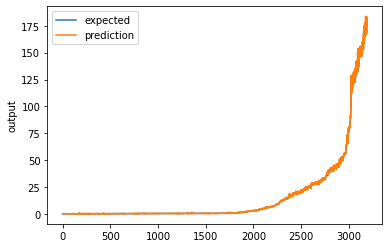

# LSTM<a href="#LSTM" class="anchor-link">¶</a>

In \[13\]:

    df3 = pd.concat([norm_input, df.Close_Output], axis=1)
    df3

Out\[13\]:

|       | Open      | High      | Low       | Close     | Volume    | Close_Output |
|-------|-----------|-----------|-----------|-----------|-----------|--------------|
| 0     | -0.468091 | -0.467760 | -0.468286 | -0.467992 | 0.421394  | 0.128348     |
| 1     | -0.468262 | -0.467945 | -0.468475 | -0.468179 | -0.446976 | 0.121652     |
| 2     | -0.468511 | -0.468191 | -0.468727 | -0.468428 | -0.654796 | 0.112723     |
| 3     | -0.468449 | -0.468114 | -0.468648 | -0.468350 | -0.711927 | 0.115513     |
| 4     | -0.468356 | -0.468022 | -0.468553 | -0.468257 | -0.750412 | 0.118862     |
| ...   | ...       | ...       | ...       | ...       | ...       | ...          |
| 10635 | 3.778657  | 3.745569  | 3.786582  | 3.781057  | -0.792931 | 152.550003   |
| 10636 | 3.718675  | 3.698715  | 3.717700  | 3.667597  | -0.793608 | 148.479996   |
| 10637 | 3.681570  | 3.661507  | 3.682413  | 3.679585  | -0.816879 | 148.910004   |
| 10638 | 3.715606  | 3.672256  | 3.684671  | 3.693244  | -0.824631 | 149.399994   |
| 10639 | 3.632469  | 3.585438  | 3.641762  | 3.618256  | -0.803825 | 146.710007   |

10640 rows × 6 columns



In \[14\]:

    def df_to_X_y( seq_size,df):
      df_as_np_X = df.iloc[:,:-1].to_numpy()
      df_as_np_y = df.iloc[:,-1].to_numpy()
      X = []
      y = []
      for i in range(len(df_as_np_X)-seq_size-1):
        row = [[a] for a in df_as_np_X[i:i+seq_size]]
        X.append(row)
        label = df_as_np_y[i+seq_size]
        y.append(label)
      return np.array(X), np.array(y)

In \[15\]:

    SEQUENCE_SIZE = 7
    x_4D,y_D = df_to_X_y(SEQUENCE_SIZE,df3)


    print("Shape of x_part: {}".format(x_4D.shape))

    print("Shape of y_part: {}".format(y_D.shape))

    Shape of x_part: (10632, 7, 1, 5)
    Shape of y_part: (10632,)

In \[16\]:

    x_3D = x_4D.reshape(x_4D.shape[0],7,5)
    x_3D.shape

Out\[16\]:

    (10632, 7, 5)

In \[17\]:

    from sklearn.model_selection import train_test_split

    from sklearn import metrics
    from collections.abc import Sequence
    from sklearn import preprocessing
    import matplotlib.pyplot as plt
    import shutil
    import os

    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.layers import Bidirectional

In \[ \]:

     

In \[18\]:

    x_train_lstm, x_test_lstm, y_train_lstm, y_test_lstm = train_test_split(x_3D, y_D, test_size=0.30 , random_state = 42)

In \[37\]:

    model = Sequential()

    model.add(LSTM(20, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5),activation='sigmoid',return_sequences= True))
    model.add(LSTM(15,activation='sigmoid',return_sequences= True))
    model.add(LSTM(10,activation='sigmoid'))
    model.add(Dense(5))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    checkpointer = ModelCheckpoint(filepath="./dnn/best_weights.hdf5", verbose=0, save_best_only=True)

    logdir = os.path.join("logs/lstm", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm), callbacks=[monitor,checkpointer,tensorboard_callback],verbose=2, epochs=200) 

    WARNING:tensorflow:Layer lstm_25 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
    WARNING:tensorflow:Layer lstm_26 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
    WARNING:tensorflow:Layer lstm_27 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

    Train...
    Epoch 1/200
    233/233 - 21s - loss: 1532.2661 - val_loss: 1224.8650 - 21s/epoch - 90ms/step
    Epoch 2/200
    233/233 - 15s - loss: 1364.8467 - val_loss: 1111.6553 - 15s/epoch - 65ms/step
    Epoch 3/200
    233/233 - 14s - loss: 1048.2278 - val_loss: 710.4719 - 14s/epoch - 61ms/step
    Epoch 4/200
    233/233 - 14s - loss: 677.9420 - val_loss: 447.1486 - 14s/epoch - 59ms/step
    Epoch 5/200
    233/233 - 14s - loss: 411.9893 - val_loss: 257.2498 - 14s/epoch - 60ms/step
    Epoch 6/200
    233/233 - 14s - loss: 228.1469 - val_loss: 132.5542 - 14s/epoch - 60ms/step
    Epoch 7/200
    233/233 - 14s - loss: 114.4304 - val_loss: 62.5678 - 14s/epoch - 61ms/step
    Epoch 8/200
    233/233 - 15s - loss: 55.2192 - val_loss: 30.2224 - 15s/epoch - 62ms/step
    Epoch 9/200
    233/233 - 14s - loss: 29.4249 - val_loss: 16.3903 - 14s/epoch - 61ms/step
    Epoch 10/200
    233/233 - 14s - loss: 17.9254 - val_loss: 9.5179 - 14s/epoch - 61ms/step
    Epoch 11/200
    233/233 - 14s - loss: 12.4147 - val_loss: 6.5284 - 14s/epoch - 61ms/step
    Epoch 12/200
    233/233 - 14s - loss: 9.2916 - val_loss: 4.7192 - 14s/epoch - 60ms/step
    Epoch 13/200
    233/233 - 14s - loss: 7.8672 - val_loss: 3.4135 - 14s/epoch - 59ms/step
    Epoch 14/200
    233/233 - 14s - loss: 6.3428 - val_loss: 3.1028 - 14s/epoch - 62ms/step
    Epoch 15/200
    233/233 - 14s - loss: 5.6701 - val_loss: 2.7526 - 14s/epoch - 59ms/step
    Epoch 16/200
    233/233 - 14s - loss: 5.6658 - val_loss: 2.4993 - 14s/epoch - 61ms/step
    Epoch 17/200
    233/233 - 14s - loss: 4.8167 - val_loss: 2.7150 - 14s/epoch - 60ms/step
    Epoch 18/200
    233/233 - 14s - loss: 4.8906 - val_loss: 2.0272 - 14s/epoch - 60ms/step
    Epoch 19/200
    233/233 - 14s - loss: 4.4361 - val_loss: 1.9790 - 14s/epoch - 61ms/step
    Epoch 20/200
    233/233 - 15s - loss: 4.2102 - val_loss: 1.6948 - 15s/epoch - 63ms/step
    Epoch 21/200
    233/233 - 13s - loss: 4.5520 - val_loss: 1.5771 - 13s/epoch - 57ms/step
    Epoch 22/200
    233/233 - 13s - loss: 4.3533 - val_loss: 1.5764 - 13s/epoch - 56ms/step
    Epoch 23/200
    233/233 - 13s - loss: 4.0327 - val_loss: 1.9189 - 13s/epoch - 56ms/step
    Epoch 24/200
    233/233 - 13s - loss: 4.0674 - val_loss: 2.0523 - 13s/epoch - 57ms/step
    Epoch 25/200
    233/233 - 13s - loss: 3.9768 - val_loss: 2.6674 - 13s/epoch - 57ms/step
    Epoch 26/200
    233/233 - 14s - loss: 3.9056 - val_loss: 2.1121 - 14s/epoch - 61ms/step
    Epoch 26: early stopping

Out\[37\]:

    <keras.callbacks.History at 0x7f821c07c130>

In \[39\]:

    %tensorboard --logdir logs

In \[38\]:

    from sklearn import metrics

    pred_lstm = model.predict(x_test_lstm)
    score = np.sqrt(metrics.mean_squared_error(pred_lstm,y_test_lstm))
    print("Score (RMSE): {}".format(score))

    100/100 [==============================] - 1s 6ms/step
    Score (RMSE): 1.4533053102614135

In \[42\]:

    import matplotlib.pyplot as plt
    pred_lstm_reg = pred_lstm.flatten()
    chart_regression(pred_lstm_reg,y_test_lstm,True)

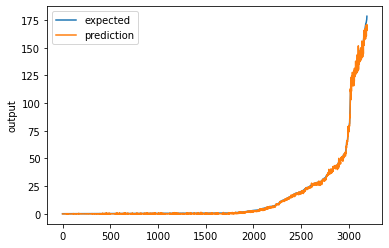

# CNN<a href="#CNN" class="anchor-link">¶</a>

In \[44\]:

    x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(x_4D, y_D, test_size=0.30 , random_state = 42)

In \[45\]:

    import tensorflow as tf
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.layers import Conv2D, MaxPooling2D

In \[46\]:

    input_shape = (x_train_cnn.shape[1], x_train_cnn.shape[2], x_train_cnn.shape[3])

In \[47\]:

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 1), padding='same',
                     activation='relu',
                     input_shape=input_shape))  
    model.add(MaxPooling2D(pool_size=(2,1), strides=None))
    # model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 1), padding='same',
                     activation='relu',
                     input_shape=input_shape))  
    model.add(MaxPooling2D(pool_size=(1, 1), strides=None))
    # model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    # model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="./dnn/best_weights.hdf5", verbose=0, save_best_only=True)

    logdir = os.path.join("logs/cnn", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In \[ \]:

    model.summary()

    Model: "sequential_13"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     conv2d_12 (Conv2D)          (None, 7, 1, 32)          512       
                                                                     
     max_pooling2d_12 (MaxPoolin  (None, 3, 1, 32)         0         
     g2D)                                                            
                                                                     
     conv2d_13 (Conv2D)          (None, 3, 1, 64)          6208      
                                                                     
     max_pooling2d_13 (MaxPoolin  (None, 3, 1, 64)         0         
     g2D)                                                            
                                                                     
     flatten_6 (Flatten)         (None, 192)               0         
                                                                     
     dense_27 (Dense)            (None, 128)               24704     
                                                                     
     dense_28 (Dense)            (None, 1)                 129       
                                                                     
    =================================================================
    Total params: 31,553
    Trainable params: 31,553
    Non-trainable params: 0
    _________________________________________________________________

In \[48\]:

    model.fit(x_train_cnn, y_train_cnn, batch_size=32 , validation_data=(x_test_cnn, y_test_cnn),callbacks=[monitor,checkpointer,tensorboard_callback] , epochs=150)

    pred_cnn = model.predict(x_test_cnn)

    Epoch 1/150
    233/233 [==============================] - 11s 7ms/step - loss: 188.6666 - val_loss: 3.1529
    Epoch 2/150
    233/233 [==============================] - 1s 6ms/step - loss: 3.2459 - val_loss: 2.3921
    Epoch 3/150
    233/233 [==============================] - 1s 6ms/step - loss: 2.8971 - val_loss: 4.6438
    Epoch 4/150
    233/233 [==============================] - 2s 7ms/step - loss: 2.7824 - val_loss: 3.0425
    Epoch 5/150
    233/233 [==============================] - 2s 8ms/step - loss: 3.0338 - val_loss: 1.7702
    Epoch 6/150
    233/233 [==============================] - 1s 6ms/step - loss: 3.0070 - val_loss: 2.9957
    Epoch 7/150
    233/233 [==============================] - 1s 6ms/step - loss: 3.2460 - val_loss: 2.0433
    Epoch 8/150
    233/233 [==============================] - 1s 6ms/step - loss: 2.6462 - val_loss: 2.1408
    Epoch 9/150
    233/233 [==============================] - 1s 6ms/step - loss: 2.4850 - val_loss: 1.6556
    Epoch 10/150
    233/233 [==============================] - 1s 6ms/step - loss: 2.6551 - val_loss: 1.9766
    Epoch 11/150
    233/233 [==============================] - 1s 6ms/step - loss: 2.6202 - val_loss: 2.0572
    Epoch 12/150
    233/233 [==============================] - 1s 6ms/step - loss: 3.4099 - val_loss: 1.9805
    Epoch 13/150
    233/233 [==============================] - 2s 8ms/step - loss: 3.0671 - val_loss: 1.3835
    Epoch 14/150
    233/233 [==============================] - 2s 8ms/step - loss: 2.3417 - val_loss: 1.4181
    Epoch 15/150
    233/233 [==============================] - 2s 6ms/step - loss: 1.9304 - val_loss: 2.0336
    Epoch 16/150
    233/233 [==============================] - 1s 6ms/step - loss: 2.7965 - val_loss: 3.5674
    Epoch 17/150
    233/233 [==============================] - 1s 6ms/step - loss: 2.9675 - val_loss: 1.5109
    Epoch 18/150
    233/233 [==============================] - 1s 6ms/step - loss: 2.7265 - val_loss: 1.4115
    Epoch 18: early stopping
    100/100 [==============================] - 0s 2ms/step

In \[50\]:

    %tensorboard --logdir logs

    Reusing TensorBoard on port 6006 (pid 11940), started 0:20:27 ago. (Use '!kill 11940' to kill it.)

In \[49\]:

    score_test = np.sqrt(metrics.mean_squared_error(pred_cnn, y_test_cnn))
    print("Score_test (RMSE): {}".format(score_test))

    Score_test (RMSE): 1.188081416527122

In \[51\]:

    import matplotlib.pyplot as plt
    pred_cnn_reg = pred_cnn.flatten()
    chart_regression(pred_cnn_reg,y_test_cnn,True)

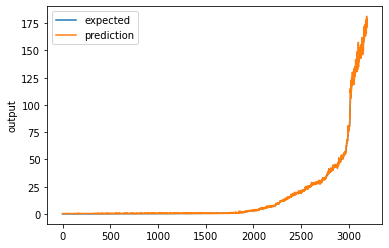

# Bidirectional<a href="#Bidirectional" class="anchor-link">¶</a>

In \[52\]:

    print('Build model...')
    modelBi = Sequential()

    modelBi.add(Bidirectional(LSTM(20, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5), return_sequences=True)))

    modelBi.add(Bidirectional(LSTM(10)))
    modelBi.add(Activation('relu'))
    # modelBi.add((Dense(10)))
    modelBi.add(Dense(1))

    modelBi.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
    print('Train...')
    checkpointer = ModelCheckpoint(filepath="./dnn/best_weights.hdf5", verbose=0, save_best_only=True)

    logdir = os.path.join("logs/Bidirectional", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    modelBi.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm), callbacks=[monitor,checkpointer,tensorboard_callback],verbose=2, epochs=200) 

    WARNING:tensorflow:Layer lstm_28 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
    WARNING:tensorflow:Layer lstm_28 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
    WARNING:tensorflow:Layer lstm_28 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

    Build model...
    Train...
    Epoch 1/200
    233/233 - 29s - loss: 1500.6720 - val_loss: 1208.4530 - 29s/epoch - 126ms/step
    Epoch 2/200
    233/233 - 20s - loss: 1367.9730 - val_loss: 1137.3591 - 20s/epoch - 84ms/step
    Epoch 3/200
    233/233 - 17s - loss: 1295.5001 - val_loss: 1077.0989 - 17s/epoch - 74ms/step
    Epoch 4/200
    233/233 - 16s - loss: 1231.5013 - val_loss: 1023.6896 - 16s/epoch - 67ms/step
    Epoch 5/200
    233/233 - 16s - loss: 1173.0826 - val_loss: 974.1190 - 16s/epoch - 68ms/step
    Epoch 6/200
    233/233 - 15s - loss: 1119.1781 - val_loss: 928.3871 - 15s/epoch - 66ms/step
    Epoch 7/200
    233/233 - 16s - loss: 1068.8276 - val_loss: 886.0172 - 16s/epoch - 69ms/step
    Epoch 8/200
    233/233 - 16s - loss: 1021.7795 - val_loss: 846.3271 - 16s/epoch - 68ms/step
    Epoch 9/200
    233/233 - 16s - loss: 977.5118 - val_loss: 809.3784 - 16s/epoch - 69ms/step
    Epoch 10/200
    233/233 - 15s - loss: 935.7349 - val_loss: 774.8159 - 15s/epoch - 66ms/step
    Epoch 11/200
    233/233 - 16s - loss: 896.2230 - val_loss: 741.1789 - 16s/epoch - 69ms/step
    Epoch 12/200
    233/233 - 17s - loss: 858.3754 - val_loss: 709.7455 - 17s/epoch - 73ms/step
    Epoch 13/200
    233/233 - 16s - loss: 814.5919 - val_loss: 668.9965 - 16s/epoch - 68ms/step
    Epoch 14/200
    233/233 - 16s - loss: 772.0500 - val_loss: 635.9608 - 16s/epoch - 68ms/step
    Epoch 15/200
    233/233 - 17s - loss: 734.7378 - val_loss: 605.3738 - 17s/epoch - 72ms/step
    Epoch 16/200
    233/233 - 17s - loss: 699.9451 - val_loss: 576.8145 - 17s/epoch - 74ms/step
    Epoch 17/200
    233/233 - 16s - loss: 666.9516 - val_loss: 549.6360 - 16s/epoch - 67ms/step
    Epoch 18/200
    233/233 - 16s - loss: 635.5265 - val_loss: 523.9816 - 16s/epoch - 69ms/step
    Epoch 19/200
    233/233 - 17s - loss: 605.5101 - val_loss: 498.9851 - 17s/epoch - 73ms/step
    Epoch 20/200
    233/233 - 15s - loss: 576.6396 - val_loss: 475.1886 - 15s/epoch - 66ms/step
    Epoch 21/200
    233/233 - 15s - loss: 548.7230 - val_loss: 452.2323 - 15s/epoch - 65ms/step
    Epoch 22/200
    233/233 - 16s - loss: 521.8542 - val_loss: 430.0487 - 16s/epoch - 71ms/step
    Epoch 23/200
    233/233 - 16s - loss: 495.8736 - val_loss: 408.3759 - 16s/epoch - 67ms/step
    Epoch 24/200
    233/233 - 16s - loss: 470.7390 - val_loss: 387.6706 - 16s/epoch - 68ms/step
    Epoch 25/200
    233/233 - 15s - loss: 446.5856 - val_loss: 367.5376 - 15s/epoch - 66ms/step
    Epoch 26/200
    233/233 - 16s - loss: 423.1967 - val_loss: 348.1203 - 16s/epoch - 70ms/step
    Epoch 27/200
    233/233 - 15s - loss: 400.7802 - val_loss: 329.4918 - 15s/epoch - 65ms/step
    Epoch 28/200
    233/233 - 15s - loss: 379.2059 - val_loss: 311.6910 - 15s/epoch - 66ms/step
    Epoch 29/200
    233/233 - 15s - loss: 358.2595 - val_loss: 293.9644 - 15s/epoch - 65ms/step
    Epoch 30/200
    233/233 - 18s - loss: 338.1806 - val_loss: 277.4879 - 18s/epoch - 79ms/step
    Epoch 31/200
    233/233 - 16s - loss: 318.7370 - val_loss: 261.1381 - 16s/epoch - 68ms/step
    Epoch 32/200
    233/233 - 15s - loss: 300.1887 - val_loss: 245.7536 - 15s/epoch - 64ms/step
    Epoch 33/200
    233/233 - 15s - loss: 282.2683 - val_loss: 230.7173 - 15s/epoch - 65ms/step
    Epoch 34/200
    233/233 - 16s - loss: 265.1117 - val_loss: 216.5856 - 16s/epoch - 70ms/step
    Epoch 35/200
    233/233 - 15s - loss: 248.5996 - val_loss: 202.5911 - 15s/epoch - 66ms/step
    Epoch 36/200
    233/233 - 16s - loss: 232.7567 - val_loss: 189.4661 - 16s/epoch - 69ms/step
    Epoch 37/200
    233/233 - 16s - loss: 217.5824 - val_loss: 176.8963 - 16s/epoch - 67ms/step
    Epoch 38/200
    233/233 - 16s - loss: 203.1301 - val_loss: 164.7836 - 16s/epoch - 71ms/step
    Epoch 39/200
    233/233 - 15s - loss: 189.4185 - val_loss: 153.1885 - 15s/epoch - 65ms/step
    Epoch 40/200
    233/233 - 16s - loss: 176.1897 - val_loss: 142.3973 - 16s/epoch - 68ms/step
    Epoch 41/200
    233/233 - 16s - loss: 163.7546 - val_loss: 132.0074 - 16s/epoch - 70ms/step
    Epoch 42/200
    233/233 - 17s - loss: 151.8719 - val_loss: 122.5484 - 17s/epoch - 71ms/step
    Epoch 43/200
    233/233 - 15s - loss: 140.5848 - val_loss: 112.8111 - 15s/epoch - 65ms/step
    Epoch 44/200
    233/233 - 15s - loss: 129.8606 - val_loss: 104.0266 - 15s/epoch - 65ms/step
    Epoch 45/200
    233/233 - 18s - loss: 119.8858 - val_loss: 95.7403 - 18s/epoch - 76ms/step
    Epoch 46/200
    233/233 - 17s - loss: 110.3693 - val_loss: 88.1945 - 17s/epoch - 72ms/step
    Epoch 47/200
    233/233 - 16s - loss: 101.4333 - val_loss: 80.4505 - 16s/epoch - 68ms/step
    Epoch 48/200
    233/233 - 16s - loss: 93.0621 - val_loss: 73.6979 - 16s/epoch - 68ms/step
    Epoch 49/200
    233/233 - 17s - loss: 85.2993 - val_loss: 67.3506 - 17s/epoch - 72ms/step
    Epoch 50/200
    233/233 - 15s - loss: 78.0387 - val_loss: 61.5751 - 15s/epoch - 66ms/step
    Epoch 51/200
    233/233 - 15s - loss: 71.1488 - val_loss: 56.0263 - 15s/epoch - 66ms/step
    Epoch 52/200
    233/233 - 16s - loss: 64.9228 - val_loss: 51.0183 - 16s/epoch - 69ms/step
    Epoch 53/200
    233/233 - 17s - loss: 59.2526 - val_loss: 46.3961 - 17s/epoch - 72ms/step
    Epoch 54/200
    233/233 - 15s - loss: 53.8673 - val_loss: 42.0917 - 15s/epoch - 65ms/step
    Epoch 55/200
    233/233 - 16s - loss: 48.9278 - val_loss: 37.9716 - 16s/epoch - 68ms/step
    Epoch 56/200
    233/233 - 17s - loss: 44.5572 - val_loss: 34.3884 - 17s/epoch - 72ms/step
    Epoch 57/200
    233/233 - 16s - loss: 40.2122 - val_loss: 31.0504 - 16s/epoch - 67ms/step
    Epoch 58/200
    233/233 - 16s - loss: 36.6763 - val_loss: 28.2927 - 16s/epoch - 68ms/step
    Epoch 59/200
    233/233 - 16s - loss: 33.2278 - val_loss: 25.3381 - 16s/epoch - 69ms/step
    Epoch 60/200
    233/233 - 17s - loss: 29.8942 - val_loss: 22.8767 - 17s/epoch - 74ms/step
    Epoch 61/200
    233/233 - 15s - loss: 27.0512 - val_loss: 20.9587 - 15s/epoch - 66ms/step
    Epoch 62/200
    233/233 - 16s - loss: 24.4065 - val_loss: 18.4797 - 16s/epoch - 68ms/step
    Epoch 63/200
    233/233 - 15s - loss: 22.3675 - val_loss: 16.6818 - 15s/epoch - 66ms/step
    Epoch 64/200
    233/233 - 18s - loss: 20.1538 - val_loss: 14.9234 - 18s/epoch - 76ms/step
    Epoch 65/200
    233/233 - 15s - loss: 18.1175 - val_loss: 13.6627 - 15s/epoch - 65ms/step
    Epoch 66/200
    233/233 - 16s - loss: 16.3793 - val_loss: 12.0032 - 16s/epoch - 68ms/step
    Epoch 67/200
    233/233 - 17s - loss: 14.9749 - val_loss: 10.9686 - 17s/epoch - 73ms/step
    Epoch 68/200
    233/233 - 15s - loss: 13.5490 - val_loss: 10.5875 - 15s/epoch - 64ms/step
    Epoch 69/200
    233/233 - 15s - loss: 12.2690 - val_loss: 9.1204 - 15s/epoch - 65ms/step
    Epoch 70/200
    233/233 - 15s - loss: 11.2859 - val_loss: 8.4220 - 15s/epoch - 66ms/step
    Epoch 71/200
    233/233 - 17s - loss: 10.2650 - val_loss: 7.3069 - 17s/epoch - 74ms/step
    Epoch 72/200
    233/233 - 16s - loss: 9.4187 - val_loss: 6.6887 - 16s/epoch - 68ms/step
    Epoch 73/200
    233/233 - 16s - loss: 8.7049 - val_loss: 5.9050 - 16s/epoch - 71ms/step
    Epoch 74/200
    233/233 - 15s - loss: 8.0961 - val_loss: 5.4147 - 15s/epoch - 66ms/step
    Epoch 75/200
    233/233 - 17s - loss: 7.6409 - val_loss: 5.1931 - 17s/epoch - 74ms/step
    Epoch 76/200
    233/233 - 16s - loss: 6.8024 - val_loss: 4.7964 - 16s/epoch - 68ms/step
    Epoch 77/200
    233/233 - 16s - loss: 6.3051 - val_loss: 5.1226 - 16s/epoch - 67ms/step
    Epoch 78/200
    233/233 - 17s - loss: 5.9674 - val_loss: 3.8889 - 17s/epoch - 71ms/step
    Epoch 79/200
    233/233 - 16s - loss: 5.5776 - val_loss: 3.7084 - 16s/epoch - 68ms/step
    Epoch 80/200
    233/233 - 15s - loss: 5.4451 - val_loss: 3.4211 - 15s/epoch - 65ms/step
    Epoch 81/200
    233/233 - 16s - loss: 4.9020 - val_loss: 3.4687 - 16s/epoch - 69ms/step
    Epoch 82/200
    233/233 - 17s - loss: 4.6635 - val_loss: 3.0883 - 17s/epoch - 74ms/step
    Epoch 83/200
    233/233 - 16s - loss: 4.4733 - val_loss: 2.6791 - 16s/epoch - 68ms/step
    Epoch 84/200
    233/233 - 15s - loss: 4.1581 - val_loss: 2.7546 - 15s/epoch - 65ms/step
    Epoch 85/200
    233/233 - 16s - loss: 4.0199 - val_loss: 2.3519 - 16s/epoch - 70ms/step
    Epoch 86/200
    233/233 - 18s - loss: 3.8170 - val_loss: 2.1584 - 18s/epoch - 78ms/step
    Epoch 87/200
    233/233 - 16s - loss: 3.6042 - val_loss: 3.4899 - 16s/epoch - 67ms/step
    Epoch 88/200
    233/233 - 15s - loss: 3.6600 - val_loss: 2.9406 - 15s/epoch - 66ms/step
    Epoch 88: early stopping

Out\[52\]:

    <keras.callbacks.History at 0x7f821c281a90>

In \[ \]:

    %tensorboard --logdir logs

    Reusing TensorBoard on port 6006 (pid 3323), started 0:59:21 ago. (Use '!kill 3323' to kill it.)

In \[53\]:

    pred_BI = modelBi.predict(x_test_lstm)

    100/100 [==============================] - 2s 8ms/step

In \[54\]:

    score = np.sqrt(metrics.mean_squared_error(pred_BI,y_test_lstm))
    print("Score (RMSE): {}".format(score))

    Score (RMSE): 1.7148207551505201

In \[ \]:

    import matplotlib.pyplot as plt
    pred_BI_reg = pred_BI.flatten()
    chart_regression(pred_BI_reg,y_test_lstm,True)

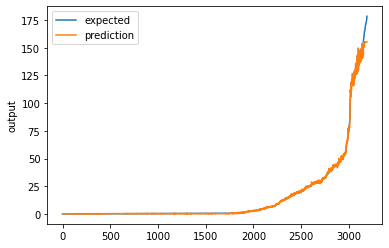

# Continuous stock price future prediction for next five days<a href="#Continuous-stock-price-future-prediction-for-next-five-days"
class="anchor-link">¶</a>

In \[ \]:

    from sklearn.preprocessing import MinMaxScaler 
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_close=df['Close']
    scaled_data = scaler.fit_transform(df_close.values.reshape(-1,1))

In \[ \]:

    df_close.shape

Out\[ \]:

    (10640,)

In \[ \]:

    import math
    training_data_len = math.ceil(len(df_close.values)* 0.7)

In \[ \]:

    train_data = scaled_data[0: training_data_len, :]

In \[ \]:

    train_data.shape

Out\[ \]:

    (7448, 1)

In \[ \]:

    x_train_cont = []
    y_train_cont = []

    for i in range(5, len(train_data)):
        x_train_cont.append(train_data[i-5:i, 0])
        y_train_cont.append(train_data[i, 0])
        
    x_train_cont, y_train_cont = np.array(x_train_cont), np.array(y_train_cont)
    x_train_cont = np.reshape(x_train_cont, (x_train_cont.shape[0], x_train_cont.shape[1], 1))

In \[ \]:

    test_data = scaled_data[training_data_len-5: , : ]
    x_test_cont = []
    y_test_cont = df_close.values[training_data_len:]

    for i in range(5, len(test_data)):
      x_test_cont.append(test_data[i-5:i, 0])

    x_test_cont = np.array(x_test_cont)
    x_test_cont = np.reshape(x_test_cont, (x_test_cont.shape[0], x_test_cont.shape[1], 1))

In \[ \]:

    x_train_cont.shape

Out\[ \]:

    (7443, 5, 1)

In \[ \]:

    y_train_cont.shape

Out\[ \]:

    (7443,)

In \[ \]:

    x_test_cont.shape

Out\[ \]:

    (3192, 5, 1)

In \[ \]:

    y_test_cont.shape

Out\[ \]:

    (3192,)

In \[ \]:

    model_5 =Sequential()
    model_5.add(LSTM(20, return_sequences=True, input_shape=(x_train_cont.shape[1], 1),activation='relu'))
    model_5.add(LSTM(20, return_sequences=False , activation='relu'))
    model_5.add(Dense(10))
    model_5.add(Dense(1))

In \[ \]:

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath="./dnn/best_weights.hdf5", verbose=0, save_best_only=True)

    logdir = os.path.join("logs/continous", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In \[ \]:

    model_5.compile(optimizer='adam', loss='mean_squared_error')


    model_5.fit(x_train_cont, y_train_cont, epochs=100 ,validation_data=(x_test_cont,y_test_cont), callbacks=[monitor,checkpointer,tensorboard_callback])

    Epoch 1/100
    233/233 [==============================] - 6s 11ms/step - loss: 4.4812e-05 - val_loss: 5199.3223
    Epoch 2/100
    233/233 [==============================] - 3s 11ms/step - loss: 3.3161e-07 - val_loss: 5198.0552
    Epoch 3/100
    233/233 [==============================] - 3s 12ms/step - loss: 2.9507e-07 - val_loss: 5197.3145
    Epoch 4/100
    233/233 [==============================] - 2s 10ms/step - loss: 4.1088e-07 - val_loss: 5196.8315
    Epoch 5/100
    233/233 [==============================] - 2s 9ms/step - loss: 4.0002e-07 - val_loss: 5196.8628
    Epoch 6/100
    233/233 [==============================] - 2s 9ms/step - loss: 5.4542e-07 - val_loss: 5196.6255
    Epoch 7/100
    233/233 [==============================] - 2s 9ms/step - loss: 3.6686e-07 - val_loss: 5197.1504
    Epoch 8/100
    233/233 [==============================] - 3s 15ms/step - loss: 3.2832e-07 - val_loss: 5196.2573
    Epoch 9/100
    233/233 [==============================] - 2s 9ms/step - loss: 3.9664e-07 - val_loss: 5196.2080
    Epoch 10/100
    233/233 [==============================] - 2s 10ms/step - loss: 3.5015e-07 - val_loss: 5196.0444
    Epoch 11/100
    233/233 [==============================] - 2s 10ms/step - loss: 3.8435e-07 - val_loss: 5195.4111
    Epoch 12/100
    233/233 [==============================] - 2s 9ms/step - loss: 4.0973e-07 - val_loss: 5196.2700
    Epoch 13/100
    233/233 [==============================] - 3s 13ms/step - loss: 3.3588e-07 - val_loss: 5196.4229
    Epoch 13: early stopping

Out\[ \]:

    <keras.callbacks.History at 0x7f77b37fbd30>

In \[ \]:

    %tensorboard --logdir logs

    Reusing TensorBoard on port 6006 (pid 3323), started 1:06:57 ago. (Use '!kill 3323' to kill it.)

In \[ \]:

    pred_5 = model_5.predict(x_test_cont)
    pred_5 = scaler.inverse_transform(pred_5)
    rmse = np.sqrt(np.mean(pred_5 - y_test_cont)**2)
    rmse

    100/100 [==============================] - 1s 3ms/step

Out\[ \]:

    17.413357476324258

In \[ \]:

    import matplotlib.pyplot as plt
    pred_5_reg = pred_5.flatten()
    chart_regression(pred_5_reg,y_test_cont,True)

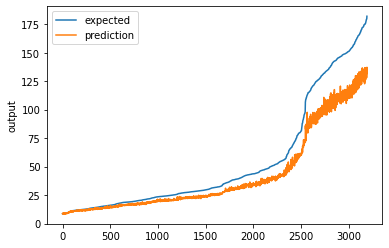